<a href="https://colab.research.google.com/github/Promyer/Tipser/blob/main/TorchTips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
from tqdm.auto import tqdm

# Selection of functions for approximation
# You can add your own functions here
AVAILABLE_FUNCTIONS = {
    "square": lambda x: x**2,
    "cube": lambda x: x**3,
    "sin": lambda x: torch.sin(x)
}

def generate_data(func_name, size=200, x_range=(-10, 10)):
    """
    Generate data for approximating the selected function.
    func_name: key in AVAILABLE_FUNCTIONS, e.g., "square", "cube", or "sin"
    size: number of points
    x_range: range of x values
    """
    if func_name not in AVAILABLE_FUNCTIONS:
        raise ValueError(f"Function '{func_name}' not found in AVAILABLE_FUNCTIONS")

    function = AVAILABLE_FUNCTIONS[func_name]
    # Generate uniformly distributed points
    x = (torch.rand(size) - 0.5) * (x_range[1] - x_range[0])
    y = function(x)
    return x, y

class CustomDataset(Dataset):
    def __init__(self, func_name="sin", size=200, x_range=(-10, 10)):
        self.x, self.y = generate_data(func_name, size, x_range)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class NeuralNetwork(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0.0
    for X, y in dataloader:
        X = X.view(-1, 1).float()
        y = y.view(-1, 1).float()
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X.size(0)
    return total_loss / len(dataloader.dataset)


In [ ]:

  # Parameters
  func_name = "sin"   # can be changed to "cube" or "sin" from AVAILABLE_FUNCTIONS
  epochs = 150
  batch_size = 8
  lr = 0.001

  # Dataset and dataloader
  dataset = CustomDataset(func_name=func_name)
  train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  # Model, loss function, and optimizer
  model = NeuralNetwork(hidden_size=64)
  loss_fn = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  # Training with tqdm progress bar
  for epoch in range(epochs):
      epoch_loss = 0.0
      with tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False) as t:
          for X, y in t:
              X = X.view(-1, 1).float()
              y = y.view(-1, 1).float()
              pred = model(X)
              loss = loss_fn(pred, y)

              optimizer.zero_grad()
              loss.backward()
              optimizer.step()

              t.set_postfix(loss=loss.item())


      # Calculate average loss over the entire dataset after each epoch
      avg_loss = train(train_dataloader, model, loss_fn, optimizer)
      print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

  # Example predictions
  test_points = torch.Tensor([[4], [7], [0], [-10], [-11]])
  print("Test points:\n", test_points)
  print("Predictions:\n", model(test_points.float()))


Epoch 1/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/150, Loss: 0.439431


Epoch 2/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 2/150, Loss: 0.393429


Epoch 3/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 3/150, Loss: 0.365886


Epoch 4/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 4/150, Loss: 0.330993


Epoch 5/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 5/150, Loss: 0.296530


Epoch 6/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 6/150, Loss: 0.288351


Epoch 7/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 7/150, Loss: 0.277353


Epoch 8/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 8/150, Loss: 0.226840


Epoch 9/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 9/150, Loss: 0.204056


Epoch 10/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 10/150, Loss: 0.198783


Epoch 11/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 11/150, Loss: 0.187401


Epoch 12/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 12/150, Loss: 0.188905


Epoch 13/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 13/150, Loss: 0.167071


Epoch 14/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 14/150, Loss: 0.167695


Epoch 15/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 15/150, Loss: 0.161555


Epoch 16/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 16/150, Loss: 0.153130


Epoch 17/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 17/150, Loss: 0.153830


Epoch 18/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 18/150, Loss: 0.148734


Epoch 19/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 19/150, Loss: 0.143979


Epoch 20/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 20/150, Loss: 0.165135


Epoch 21/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 21/150, Loss: 0.137792


Epoch 22/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 22/150, Loss: 0.126873


Epoch 23/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 23/150, Loss: 0.128783


Epoch 24/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 24/150, Loss: 0.121882


Epoch 25/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 25/150, Loss: 0.121300


Epoch 26/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 26/150, Loss: 0.118788


Epoch 27/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 27/150, Loss: 0.139167


Epoch 28/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 28/150, Loss: 0.122051


Epoch 29/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 29/150, Loss: 0.117513


Epoch 30/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 30/150, Loss: 0.113607


Epoch 31/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 31/150, Loss: 0.122425


Epoch 32/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 32/150, Loss: 0.110679


Epoch 33/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 33/150, Loss: 0.104002


Epoch 34/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 34/150, Loss: 0.115948


Epoch 35/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 35/150, Loss: 0.106279


Epoch 36/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 36/150, Loss: 0.118761


Epoch 37/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 37/150, Loss: 0.099130


Epoch 38/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 38/150, Loss: 0.115747


Epoch 39/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 39/150, Loss: 0.094255


Epoch 40/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 40/150, Loss: 0.104753


Epoch 41/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 41/150, Loss: 0.115513


Epoch 42/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 42/150, Loss: 0.086528


Epoch 43/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 43/150, Loss: 0.090278


Epoch 44/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 44/150, Loss: 0.087140


Epoch 45/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 45/150, Loss: 0.089115


Epoch 46/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 46/150, Loss: 0.083984


Epoch 47/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 47/150, Loss: 0.086789


Epoch 48/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 48/150, Loss: 0.090750


Epoch 49/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 49/150, Loss: 0.074867


Epoch 50/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 50/150, Loss: 0.088784


Epoch 51/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 51/150, Loss: 0.067741


Epoch 52/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 52/150, Loss: 0.085734


Epoch 53/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 53/150, Loss: 0.070387


Epoch 54/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 54/150, Loss: 0.075582


Epoch 55/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 55/150, Loss: 0.076793


Epoch 56/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 56/150, Loss: 0.065553


Epoch 57/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 57/150, Loss: 0.070621


Epoch 58/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 58/150, Loss: 0.064262


Epoch 59/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 59/150, Loss: 0.073161


Epoch 60/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 60/150, Loss: 0.060587


Epoch 61/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 61/150, Loss: 0.062021


Epoch 62/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 62/150, Loss: 0.057096


Epoch 63/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 63/150, Loss: 0.073316


Epoch 64/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 64/150, Loss: 0.063276


Epoch 65/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 65/150, Loss: 0.054353


Epoch 66/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 66/150, Loss: 0.048240


Epoch 67/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 67/150, Loss: 0.055295


Epoch 68/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 68/150, Loss: 0.049259


Epoch 69/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 69/150, Loss: 0.053949


Epoch 70/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 70/150, Loss: 0.047886


Epoch 71/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 71/150, Loss: 0.051487


Epoch 72/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 72/150, Loss: 0.047456


Epoch 73/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 73/150, Loss: 0.048202


Epoch 74/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 74/150, Loss: 0.052231


Epoch 75/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 75/150, Loss: 0.045219


Epoch 76/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 76/150, Loss: 0.044635


Epoch 77/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 77/150, Loss: 0.039293


Epoch 78/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 78/150, Loss: 0.037328


Epoch 79/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 79/150, Loss: 0.038302


Epoch 80/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 80/150, Loss: 0.032510


Epoch 81/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 81/150, Loss: 0.037659


Epoch 82/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 82/150, Loss: 0.037982


Epoch 83/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 83/150, Loss: 0.029247


Epoch 84/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 84/150, Loss: 0.031306


Epoch 85/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 85/150, Loss: 0.025891


Epoch 86/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 86/150, Loss: 0.033012


Epoch 87/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 87/150, Loss: 0.027788


Epoch 88/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 88/150, Loss: 0.032574


Epoch 89/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 89/150, Loss: 0.037243


Epoch 90/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 90/150, Loss: 0.022512


Epoch 91/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 91/150, Loss: 0.021337


Epoch 92/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 92/150, Loss: 0.031131


Epoch 93/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 93/150, Loss: 0.021128


Epoch 94/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 94/150, Loss: 0.020071


Epoch 95/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 95/150, Loss: 0.021345


Epoch 96/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 96/150, Loss: 0.020353


Epoch 97/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 97/150, Loss: 0.027390


Epoch 98/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 98/150, Loss: 0.022018


Epoch 99/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 99/150, Loss: 0.017674


Epoch 100/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 100/150, Loss: 0.020081


Epoch 101/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 101/150, Loss: 0.018416


Epoch 102/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 102/150, Loss: 0.016285


Epoch 103/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 103/150, Loss: 0.016313


Epoch 104/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 104/150, Loss: 0.012991


Epoch 105/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 105/150, Loss: 0.018674


Epoch 106/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 106/150, Loss: 0.017275


Epoch 107/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 107/150, Loss: 0.011310


Epoch 108/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 108/150, Loss: 0.012795


Epoch 109/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 109/150, Loss: 0.010989


Epoch 110/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 110/150, Loss: 0.012273


Epoch 111/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 111/150, Loss: 0.011910


Epoch 112/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 112/150, Loss: 0.011778


Epoch 113/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 113/150, Loss: 0.009907


Epoch 114/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 114/150, Loss: 0.011006


Epoch 115/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 115/150, Loss: 0.010278


Epoch 116/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 116/150, Loss: 0.012648


Epoch 117/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 117/150, Loss: 0.008551


Epoch 118/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 118/150, Loss: 0.010633


Epoch 119/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 119/150, Loss: 0.005368


Epoch 120/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 120/150, Loss: 0.011066


Epoch 121/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 121/150, Loss: 0.008577


Epoch 122/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 122/150, Loss: 0.005376


Epoch 123/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 123/150, Loss: 0.011214


Epoch 124/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 124/150, Loss: 0.006530


Epoch 125/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 125/150, Loss: 0.008441


Epoch 126/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 126/150, Loss: 0.005654


Epoch 127/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 127/150, Loss: 0.004617


Epoch 128/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 128/150, Loss: 0.006293


Epoch 129/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 129/150, Loss: 0.004950


Epoch 130/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 130/150, Loss: 0.009006


Epoch 131/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 131/150, Loss: 0.006622


Epoch 132/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 132/150, Loss: 0.006385


Epoch 133/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 133/150, Loss: 0.010017


Epoch 134/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 134/150, Loss: 0.004479


Epoch 135/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 135/150, Loss: 0.005219


Epoch 136/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 136/150, Loss: 0.010161


Epoch 137/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 137/150, Loss: 0.005063


Epoch 138/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 138/150, Loss: 0.005543


Epoch 139/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 139/150, Loss: 0.002791


Epoch 140/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 140/150, Loss: 0.003246


Epoch 141/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 141/150, Loss: 0.003018


Epoch 142/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 142/150, Loss: 0.003860


Epoch 143/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 143/150, Loss: 0.003753


Epoch 144/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 144/150, Loss: 0.005047


Epoch 145/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 145/150, Loss: 0.003373


Epoch 146/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 146/150, Loss: 0.002933


Epoch 147/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 147/150, Loss: 0.006186


Epoch 148/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 148/150, Loss: 0.011315


Epoch 149/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 149/150, Loss: 0.004158


Epoch 150/150:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 150/150, Loss: 0.007372
Test points:
 tensor([[  4.],
        [  7.],
        [  0.],
        [-10.],
        [-11.]])
Predictions:
 tensor([[-0.6892],
        [ 0.7333],
        [-0.0593],
        [ 0.3202],
        [ 0.8581]], grad_fn=<AddmmBackward0>)


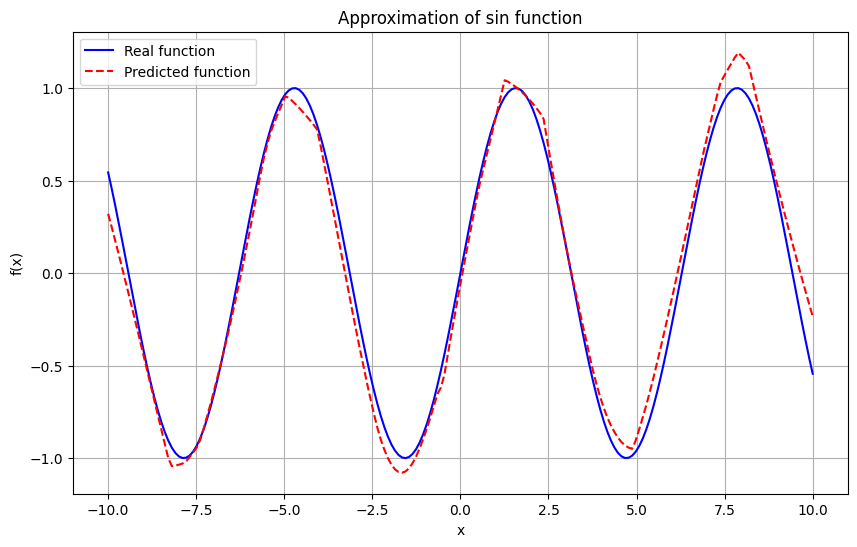

In [ ]:
import matplotlib.pyplot as plt
import torch

test_x = torch.linspace(-10, 10, 200).view(-1, 1)
with torch.no_grad():
    pred_y = model(test_x.float())

real_y = AVAILABLE_FUNCTIONS[func_name](test_x.squeeze())

plt.figure(figsize=(10, 6))
plt.plot(test_x.squeeze().numpy(), real_y.numpy(), label='Real function', color='blue')
plt.plot(test_x.squeeze().numpy(), pred_y.squeeze().numpy(), label='Predicted function', color='red', linestyle='--')
plt.title(f"Approximation of {func_name} function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()